# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

from nltk.corpus import stopwords
import pickle

#from tqdm import tqdm
#import os

## 1. Reading Data

In [ ]:
project_data = pd.read_csv('train_data.csv', nrows=5000)
resource_data = pd.read_csv('resources.csv')

In [ ]:
import pandas as pd
preprocessed_data = pd.read_csv('preprocessed_data.csv')

In [ ]:
preprocessed_data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [ ]:
preprocessed_data.shape

(109248, 9)

In [ ]:
# Import K# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [ ]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [ ]:
Y = preprocessed_data['project_is_approved']

In [ ]:
X = preprocessed_data.drop('project_is_approved',axis=1)

In [ ]:
X.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [ ]:
#https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/

In [ ]:
from sklearn.model_selection import train_test_split
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y,
                                                             test_size=0.3, random_state=42)


In [ ]:
y_train.value_counts()

1    64894
0    11579
Name: project_is_approved, dtype: int64

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer_essay = Tokenizer()
tokenizer_essay.fit_on_texts(X_train['essay'].values)

essay_train = tokenizer_essay.texts_to_sequences(X_train['essay'].values)
essay_test = tokenizer_essay.texts_to_sequences(X_test['essay'].values)

In [ ]:
from keras.preprocessing import sequence
#max_length = max(len1)
essay_train = sequence.pad_sequences(essay_train,maxlen=331)
essay_test = sequence.pad_sequences(essay_test,maxlen=331)

In [ ]:
tokenizer_clean_categories = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer_clean_categories.fit_on_texts(X_train['clean_categories'].values)

clean_categories_train = tokenizer_clean_categories.texts_to_sequences(X_train['clean_categories'].values)
clean_categories_test = tokenizer_clean_categories.texts_to_sequences(X_test['clean_categories'].values)

clean_categories_train = sequence.pad_sequences(clean_categories_train)
clean_categories_test = sequence.pad_sequences(clean_categories_test)

In [ ]:
print (clean_categories_train.shape)
print (clean_categories_test.shape)

(76473, 3)
(32775, 3)


In [ ]:
tokenizer_clean_subcategories = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer_clean_subcategories.fit_on_texts(X_train['clean_subcategories'].values)

clean_subcategories_train = tokenizer_clean_subcategories.texts_to_sequences(X_train['clean_subcategories'].values)
clean_subcategories_test = tokenizer_clean_subcategories.texts_to_sequences(X_test['clean_subcategories'].values)

clean_subcategories_train = sequence.pad_sequences(clean_subcategories_train)
clean_subcategories_test = sequence.pad_sequences(clean_subcategories_test)

In [ ]:
print (clean_subcategories_train.shape)
print (clean_subcategories_test.shape)

(76473, 3)
(32775, 3)


In [ ]:
tokenizer_school_state = Tokenizer()
tokenizer_school_state.fit_on_texts(X_train['school_state'].values)

school_state_train = tokenizer_school_state.texts_to_sequences(X_train['school_state'].values)
school_state_test = tokenizer_school_state.texts_to_sequences(X_test['school_state'].values)

school_state_train = sequence.pad_sequences(school_state_train)
school_state_test = sequence.pad_sequences(school_state_test)

In [ ]:
print (school_state_train.shape)
print (school_state_test.shape)

(76473, 1)
(32775, 1)


In [ ]:
tokenizer_teacher_prefix = Tokenizer()
tokenizer_teacher_prefix.fit_on_texts(X_train['teacher_prefix'].values)

teacher_prefix_train = tokenizer_teacher_prefix.texts_to_sequences(X_train['teacher_prefix'].values)
teacher_prefix_test = tokenizer_teacher_prefix.texts_to_sequences(X_test['teacher_prefix'].values)

teacher_prefix_train = sequence.pad_sequences(teacher_prefix_train)
teacher_prefix_test = sequence.pad_sequences(teacher_prefix_test)

In [ ]:
print (teacher_prefix_train.shape)
print (teacher_prefix_test.shape)

(76473, 1)
(32775, 1)


In [ ]:
tokenizer_project_grade_category = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer_project_grade_category.fit_on_texts(X_train['project_grade_category'].values)

project_grade_category_train = tokenizer_project_grade_category.texts_to_sequences(X_train['project_grade_category'].values)
project_grade_category_test = tokenizer_project_grade_category.texts_to_sequences(X_test['project_grade_category'].values)

project_grade_category_train = sequence.pad_sequences(project_grade_category_train)
project_grade_category_test = sequence.pad_sequences(project_grade_category_test)

In [ ]:
print (project_grade_category_train.shape)
print (project_grade_category_test.shape)

(76473, 1)
(32775, 1)


# MODEL 1

In [ ]:
num_feat_train = X_train[['price','teacher_number_of_previously_posted_projects']]

In [ ]:
num_feat_test = X_test[['price','teacher_number_of_previously_posted_projects']]

In [ ]:
num_feat_train.shape

(76473, 2)

In [ ]:
num_feat = Input(shape=(2,),name = 'num_feat')
dense_out = Dense(2)(num_feat)
#dense_out = Flatten()(dense_out)

In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense, Flatten
from keras.models import Model
import keras
from keras.layers import LeakyReLU
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import keras.backend as K
from sklearn.utils import class_weight
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint


class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)

'''def auc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
'''
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc  
best_model = ModelCheckpoint('best_model_donor.h5', monitor='val_auc', mode='max', verbose=0, save_best_only=True)
#from keras.layers import Dense, Dropout,
essay_input = Input(shape=(essay_train.shape[1],), name='essay_input')
essay = Embedding(output_dim=32, input_dim=len (tokenizer_essay.word_index)+1, input_length=essay_train.shape[1])(essay_input)
lstm_out = LSTM(100, return_sequences = True)(essay)
lstm_out = Flatten()(lstm_out)

clean_categories_input = Input(shape=(clean_categories_train.shape[1],), dtype='int32', name='clean_categories_input')
clean_categories = Embedding(output_dim=1, input_dim=len (tokenizer_clean_categories.word_index)+1, input_length=clean_categories_train.shape[1])(clean_categories_input)
clean_categories = Flatten()(clean_categories)

clean_subcategories_input = Input(shape=(clean_subcategories_train.shape[1],), dtype='int32', name='clean_subcategories_input')
clean_subcategories = Embedding(output_dim=1, input_dim=len (tokenizer_clean_subcategories.word_index)+1, input_length=clean_subcategories_train.shape[1])(clean_subcategories_input)
clean_subcategories = Flatten()(clean_subcategories)

school_state_input = Input(shape=(school_state_train.shape[1],), dtype='int32', name='school_state_input')
school_state = Embedding(output_dim=1, input_dim=len (tokenizer_school_state.word_index)+1, input_length=school_state_train.shape[1])(school_state_input)
school_state = Flatten()(school_state)

teacher_prefix_input = Input(shape=(teacher_prefix_train.shape[1],), dtype='int32', name='teacher_prefix_input')
teacher_prefix = Embedding(output_dim=1, input_dim=len (tokenizer_teacher_prefix.word_index)+1, input_length=teacher_prefix_train.shape[1])(teacher_prefix_input)
teacher_prefix = Flatten()(teacher_prefix)

project_grade_category_input = Input(shape=(project_grade_category_train.shape[1],), dtype='int32', name='project_grade_category_input')
project_grade_category = Embedding(output_dim=1, input_dim=len (tokenizer_project_grade_category.word_index)+1, input_length=project_grade_category_train.shape[1])(project_grade_category_input)
project_grade_category = Flatten()(project_grade_category)

num_feat = Input(shape=(2,),name = 'num_feat')
dense_out = Dense(2)(num_feat)
#dense_out = Flatten()(dense_out)

concat_layer = keras.layers.concatenate([lstm_out,clean_categories,clean_subcategories,
                                         school_state,teacher_prefix,project_grade_category,
                                         dense_out])
model1 = Dense(32,activation='relu',kernel_initializer='he_normal')(concat_layer)
model1 = BatchNormalization()(model1)
model1 = Dropout(1-0.5)(model1)
model1 = Dense(16, activation='relu',kernel_initializer='he_normal')(model1)
model1 = Dropout(1-0.5)(model1)
model1 = Dense(16, activation='relu',kernel_initializer='he_normal')(model1)

main_output = Dense(1, activation='sigmoid', name='main_output')(model1)
model = Model(inputs=[essay_input,clean_categories_input,clean_subcategories_input,school_state_input,
                      teacher_prefix_input,project_grade_category_input,num_feat], outputs=[main_output])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',auc])
#model.summary()
history = model.fit([essay_train,clean_categories_train,clean_subcategories_train,school_state_train,
                      teacher_prefix_train,project_grade_category_train,num_feat_train],y_train,batch_size=128, epochs=10,
                   validation_data = ([essay_test,clean_categories_test,clean_subcategories_test,school_state_test,
                      teacher_prefix_test,project_grade_category_test,num_feat_test],y_test),class_weight=class_weight)
model.save('my_model_donor.h5')

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 76473 samples, validate on 32775 samples
Epoch 1/10
76473/76473 [==============================] - 760s 10ms/step - loss: 0.5093 - acc: 0.7940 - auc: 0.5519 - val_loss: 0.7375 - val_acc: 0.4568 - val_auc: 0.5860
Epoch 2/10
76473/76473 [==============================] - 760s 10ms/step - loss: 0.4051 - acc: 0.8467 - auc: 0.6020 - val_loss: 1.2827 - val_acc: 0.1727 - val_auc: 0.6047
Epoch 3/10
76473/76473 [==============================] - 759s 10ms/step - loss: 0.3708 - acc: 0.8505 - auc: 0.6115 - val_loss: 5.1972 - val_acc: 0.1519 - val_auc: 0.6156
Epoch 4/10
76473/76473 [==============================] - 758s 10ms/step - loss: 0.3501 - acc: 0.8529 - auc: 0.6210 - val_loss: 0.4575 - val_acc: 0.8486 - val_auc: 0.6350
Epoch 5/10
76473/76473 [==============================] - 755s 10ms/step - loss: 0.3311 - acc: 0.8572 - auc: 0.6498 - val_loss: 1.2004 - val

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

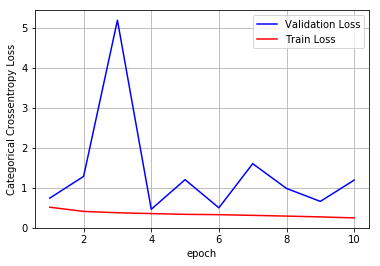

In [ ]:
#score = model.evaluate(X_test, y_test) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])
#print('Test auc:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
epochs=10
# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

32775/32775 [==============================] - 90s 3ms/step
Test score: 1.1891550716066084
Test accuracy: 0.8481464530892449
Test auc: 0.7019936615178641


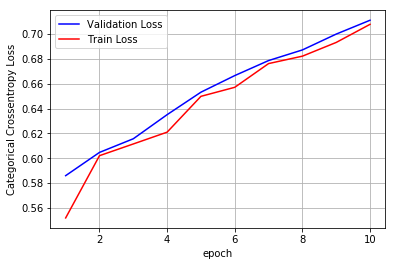

In [ ]:
score = model.evaluate([essay_test,clean_categories_test,clean_subcategories_test,school_state_test,
                      teacher_prefix_test,project_grade_category_test,num_feat_test],y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
print('Test auc:', score[2])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
epochs=10
# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_auc']
ty = history.history['auc']
plt_dynamic(x, vy, ty, ax)

In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense, Flatten
from keras.models import Model
import keras
from keras.layers import LeakyReLU
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import keras.backend as K
from sklearn.utils import class_weight
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint

'''def auc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
'''
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc  
best_model = ModelCheckpoint('best_model_donor1.h5', monitor='val_auc', mode='max', verbose=0, save_best_only=True)
#from keras.layers import Dense, Dropout,
essay_input = Input(shape=(essay_train.shape[1],), name='essay_input')
essay = Embedding(output_dim=32, input_dim=len (tokenizer_essay.word_index)+1, input_length=essay_train.shape[1])(essay_input)
lstm_out = LSTM(100, return_sequences = True)(essay)
lstm_out = Flatten()(lstm_out)

clean_categories_input = Input(shape=(clean_categories_train.shape[1],), dtype='int32', name='clean_categories_input')
clean_categories = Embedding(output_dim=1, input_dim=len (tokenizer_clean_categories.word_index)+1, input_length=clean_categories_train.shape[1])(clean_categories_input)
clean_categories = Flatten()(clean_categories)

clean_subcategories_input = Input(shape=(clean_subcategories_train.shape[1],), dtype='int32', name='clean_subcategories_input')
clean_subcategories = Embedding(output_dim=1, input_dim=len (tokenizer_clean_subcategories.word_index)+1, input_length=clean_subcategories_train.shape[1])(clean_subcategories_input)
clean_subcategories = Flatten()(clean_subcategories)

school_state_input = Input(shape=(school_state_train.shape[1],), dtype='int32', name='school_state_input')
school_state = Embedding(output_dim=1, input_dim=len (tokenizer_school_state.word_index)+1, input_length=school_state_train.shape[1])(school_state_input)
school_state = Flatten()(school_state)

teacher_prefix_input = Input(shape=(teacher_prefix_train.shape[1],), dtype='int32', name='teacher_prefix_input')
teacher_prefix = Embedding(output_dim=1, input_dim=len (tokenizer_teacher_prefix.word_index)+1, input_length=teacher_prefix_train.shape[1])(teacher_prefix_input)
teacher_prefix = Flatten()(teacher_prefix)

project_grade_category_input = Input(shape=(project_grade_category_train.shape[1],), dtype='int32', name='project_grade_category_input')
project_grade_category = Embedding(output_dim=1, input_dim=len (tokenizer_project_grade_category.word_index)+1, input_length=project_grade_category_train.shape[1])(project_grade_category_input)
project_grade_category = Flatten()(project_grade_category)

num_feat = Input(shape=(2,),name = 'num_feat')
dense_out = Dense(2)(num_feat)
#dense_out = Flatten()(dense_out)

concat_layer = keras.layers.concatenate([lstm_out,clean_categories,clean_subcategories,
                                         school_state,teacher_prefix,project_grade_category,
                                         dense_out])
model1 = Dense(32,activation='relu',kernel_initializer='he_normal')(concat_layer)
model1 = BatchNormalization()(model1)
model1 = Dropout(1-0.5)(model1)
model1 = Dense(16, activation='relu',kernel_initializer='he_normal')(model1)
model1 = Dropout(1-0.5)(model1)
model1 = Dense(16, activation='relu',kernel_initializer='he_normal')(model1)

main_output = Dense(1, activation='sigmoid', name='main_output')(model1)
model = Model(inputs=[essay_input,clean_categories_input,clean_subcategories_input,school_state_input,
                      teacher_prefix_input,project_grade_category_input,num_feat], outputs=[main_output])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',auc])
#model.summary()
history = model.fit([essay_train,clean_categories_train,clean_subcategories_train,school_state_train,
                      teacher_prefix_train,project_grade_category_train,num_feat_train],y_train,batch_size=128, epochs=10,
                   validation_data = ([essay_test,clean_categories_test,clean_subcategories_test,school_state_test,
                      teacher_prefix_test,project_grade_category_test,num_feat_test],y_test))
model.save('my_model_donor1.h5')

Train on 76473 samples, validate on 32775 samples
Epoch 1/10
76473/76473 [==============================] - 898s 12ms/step - loss: 0.4667 - acc: 0.8274 - auc: 0.5725 - val_loss: 0.4102 - val_acc: 0.8486 - val_auc: 0.6244
Epoch 2/10
76473/76473 [==============================] - 892s 12ms/step - loss: 0.3908 - acc: 0.8481 - auc: 0.6532 - val_loss: 0.3913 - val_acc: 0.8486 - val_auc: 0.6724
Epoch 3/10
76473/76473 [==============================] - 886s 12ms/step - loss: 0.3645 - acc: 0.8484 - auc: 0.6909 - val_loss: 0.7347 - val_acc: 0.2899 - val_auc: 0.6839
Epoch 4/10
76473/76473 [==============================] - 887s 12ms/step - loss: 0.3445 - acc: 0.8490 - auc: 0.6818 - val_loss: 1.2052 - val_acc: 0.8486 - val_auc: 0.6808
Epoch 5/10
76473/76473 [==============================] - 889s 12ms/step - loss: 0.3277 - acc: 0.8495 - auc: 0.6826 - val_loss: 0.5194 - val_acc: 0.8486 - val_auc: 0.6917
Epoch 6/10
76473/76473 [==============================] - 891s 12ms/step - loss: 0.3120 - acc: 

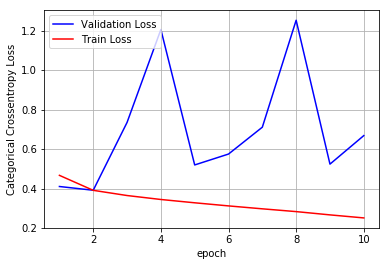

In [ ]:
#score = model.evaluate(X_test, y_test) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])
#print('Test auc:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
epochs=10
# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
score = model.evaluate([essay_test,clean_categories_test,clean_subcategories_test,school_state_test,
                      teacher_prefix_test,project_grade_category_test,num_feat_test],y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
print('Test auc:', score[2])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
epochs=10
# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_auc']
ty = history.history['auc']
plt_dynamic(x, vy, ty, ax)

# Model2

In [ ]:
#https://stackoverflow.com/questions/48431173/is-there-a-way-to-get-only-the-idf-values-of-words-using-scikit-or-any-other-pyt?rq=1
tf = TfidfVectorizer(use_idf=True)
tf.fit_transform(X_train['essay'].values)
idf = tf.idf_ 

In [ ]:
idf.shape

(49096,)

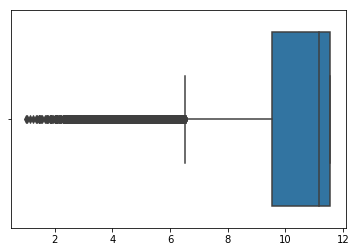

In [ ]:
import seaborn as sns
sns.boxplot(idf)

In [ ]:
sort_idf = sorted(idf)

In [ ]:
sort_idf[int (49096/4)]

9.536655891662718

In [ ]:
sort_idf[int (49096*3/4)]

11.551558912204982

In [ ]:
#https://stackoverflow.com/questions/48431173/is-there-a-way-to-get-only-the-idf-values-of-words-using-scikit-or-any-other-pyt?rq=1
tf1 = TfidfVectorizer(use_idf=True,min_df=6,max_df=11.56)
tf1.fit_transform(X_train['essay'].values)
idf1 = tf1.idf_ 

In [ ]:
vocabulary = tf1.get_feature_names()

In [ ]:
idf_text = []
for  sent in X_train['essay'].values:
    text = ' '.join(e for e in sent.split() if e in vocabulary)
    idf_text.append(text)

In [ ]:
idf_text1 =idf_text.copy()

In [ ]:
X_train['idf_text'] = idf_text

In [ ]:
X_train.shape

(76473, 9)

In [ ]:
import pickle
X_train.to_pickle('X_train')

In [ ]:
import pickle
X_train = load_pickle('X_train')

In [ ]:
type (X_train['idf_text'][0])

str

In [ ]:
l = max([len (text.split()) for text in X_train['idf_text'].values])
print (l)

327


In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer_essay_idf = Tokenizer()
tokenizer_essay_idf.fit_on_texts(X_train['idf_text'].values)

essay_idf_train = tokenizer_essay_idf.texts_to_sequences(X_train['idf_text'].values)
essay_idf_test = tokenizer_essay_idf.texts_to_sequences(X_test['essay'].values)

In [ ]:
from keras.preprocessing import sequence
#max_length = max(len1)
essay_idf_train = sequence.pad_sequences(essay_idf_train,maxlen=327)
essay_idf_test = sequence.pad_sequences(essay_idf_test,maxlen=327)

In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense, Flatten
from keras.models import Model
#from keras.layers import Dense, Dropout,
essay_idf_input = Input(shape=(essay_idf_train.shape[1],), name='essay_idf_input')

essay_idf = Embedding(output_dim=64, input_dim=len (tokenizer_essay.word_index)+1, input_length=essay_idf_train.shape[1])(essay_idf_input)

lstm_out_idf = LSTM(32, return_sequences = True)(essay_idf)
lstm_out_idf = Flatten()(lstm_out_idf)

In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense, Flatten
from keras.models import Model
import keras
from keras.layers import LeakyReLU
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import keras.backend as K
from sklearn.utils import class_weight
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint


class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)

'''def auc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
'''
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc  
best_model = ModelCheckpoint('best_model_donor2.h5', monitor='val_auc', mode='max', verbose=0, save_best_only=True)
#from keras.layers import Dense, Dropout,
essay_idf_input = Input(shape=(essay_idf_train.shape[1],), name='essay_idf_input')
essay_idf = Embedding(output_dim=64, input_dim=len (tokenizer_essay.word_index)+1, input_length=essay_idf_train.shape[1])(essay_idf_input)
lstm_out_idf = LSTM(128, return_sequences = True)(essay_idf)
lstm_out_idf = Dropout(1-0.8)(lstm_out_idf)
lstm_out_idf = Flatten()(lstm_out_idf)

clean_categories_input = Input(shape=(clean_categories_train.shape[1],), dtype='int32', name='clean_categories_input')
clean_categories = Embedding(output_dim=1, input_dim=len (tokenizer_clean_categories.word_index)+1, input_length=clean_categories_train.shape[1])(clean_categories_input)
clean_categories = Flatten()(clean_categories)

clean_subcategories_input = Input(shape=(clean_subcategories_train.shape[1],), dtype='int32', name='clean_subcategories_input')
clean_subcategories = Embedding(output_dim=1, input_dim=len (tokenizer_clean_subcategories.word_index)+1, input_length=clean_subcategories_train.shape[1])(clean_subcategories_input)
clean_subcategories = Flatten()(clean_subcategories)

school_state_input = Input(shape=(school_state_train.shape[1],), dtype='int32', name='school_state_input')
school_state = Embedding(output_dim=1, input_dim=len (tokenizer_school_state.word_index)+1, input_length=school_state_train.shape[1])(school_state_input)
school_state = Flatten()(school_state)

teacher_prefix_input = Input(shape=(teacher_prefix_train.shape[1],), dtype='int32', name='teacher_prefix_input')
teacher_prefix = Embedding(output_dim=1, input_dim=len (tokenizer_teacher_prefix.word_index)+1, input_length=teacher_prefix_train.shape[1])(teacher_prefix_input)
teacher_prefix = Flatten()(teacher_prefix)

project_grade_category_input = Input(shape=(project_grade_category_train.shape[1],), dtype='int32', name='project_grade_category_input')
project_grade_category = Embedding(output_dim=1, input_dim=len (tokenizer_project_grade_category.word_index)+1, input_length=project_grade_category_train.shape[1])(project_grade_category_input)
project_grade_category = Flatten()(project_grade_category)

num_feat = Input(shape=(2,),name = 'num_feat')
dense_out = Dense(2)(num_feat)
#dense_out = Flatten()(dense_out)

concat_layer = keras.layers.concatenate([lstm_out_idf,clean_categories,clean_subcategories,
                                         school_state,teacher_prefix,project_grade_category,
                                         dense_out])
model1 = Dense(64,activation='relu',kernel_initializer='he_normal')(concat_layer)
model1 = BatchNormalization()(model1)
model1 = Dropout(1-0.5)(model1)
model1 = Dense(32, activation='relu',kernel_initializer='he_normal')(model1)
model1 = Dropout(1-0.5)(model1)
model1 = Dense(32, activation='relu',kernel_initializer='he_normal')(model1)

main_output = Dense(1, activation='sigmoid', name='main_output')(model1)
model = Model(inputs=[essay_idf_input,clean_categories_input,clean_subcategories_input,school_state_input,
                      teacher_prefix_input,project_grade_category_input,num_feat], outputs=[main_output])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',auc])
#model.summary()
history = model.fit([essay_idf_train,clean_categories_train,clean_subcategories_train,school_state_train,
                      teacher_prefix_train,project_grade_category_train,num_feat_train],y_train,batch_size=128, epochs=10,
                   validation_data = ([essay_idf_test,clean_categories_test,clean_subcategories_test,school_state_test,
                      teacher_prefix_test,project_grade_category_test,num_feat_test],y_test),class_weight=class_weight)
model.save('my_model_donor2.h5')

Train on 76473 samples, validate on 32775 samples
Epoch 1/10
76473/76473 [==============================] - 1311s 17ms/step - loss: 0.4927 - acc: 0.8240 - auc: 0.5319 - val_loss: 0.4236 - val_acc: 0.8486 - val_auc: 0.5409
Epoch 2/10
76473/76473 [==============================] - 1304s 17ms/step - loss: 0.4401 - acc: 0.8474 - auc: 0.5458 - val_loss: 0.4243 - val_acc: 0.8486 - val_auc: 0.5474
Epoch 3/10
76473/76473 [==============================] - 1301s 17ms/step - loss: 0.4298 - acc: 0.8482 - auc: 0.5504 - val_loss: 0.4242 - val_acc: 0.8486 - val_auc: 0.5520
Epoch 4/10
76473/76473 [==============================] - 1266s 17ms/step - loss: 0.4254 - acc: 0.8485 - auc: 0.5540 - val_loss: 0.4217 - val_acc: 0.8486 - val_auc: 0.5555
Epoch 5/10
76473/76473 [==============================] - 1216s 16ms/step - loss: 0.4241 - acc: 0.8485 - auc: 0.5568 - val_loss: 0.4207 - val_acc: 0.8486 - val_auc: 0.5581
Epoch 6/10
76473/76473 [==============================] - 1247s 16ms/step - loss: 0.4220 -

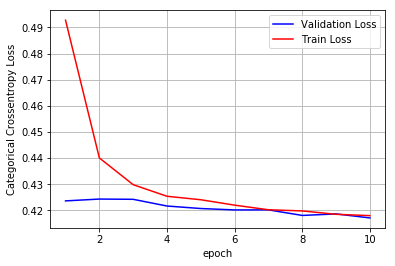

In [ ]:
#score = model.evaluate(X_test, y_test) 
#print('Test score:', score[0]) 
#print('Test accuracy:', score[1])
#print('Test auc:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
epochs=10
# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

32775/32775 [==============================] - 133s 4ms/step
Test score: 0.41710273124624264
Test accuracy: 0.8485736079328756
Test auc: 0.5711375111827952


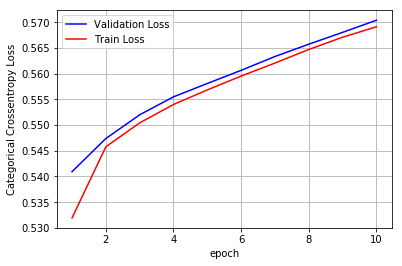

In [ ]:
score = model.evaluate([essay_idf_test,clean_categories_test,clean_subcategories_test,school_state_test,
                      teacher_prefix_test,project_grade_category_test,num_feat_test],y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
print('Test auc:', score[2])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
epochs=10
# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_auc']
ty = history.history['auc']
plt_dynamic(x, vy, ty, ax)

# MODEL3

In [ ]:
import pickle
import pandas as pd
glo_vec = pd.read_pickle('glove_vectors')

In [ ]:
word_index = tokenizer_essay.word_index

In [ ]:
#https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = glo_vec.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import Embedding
EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 331
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
X_train.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [ ]:
school_state = CountVectorizer()
school_state_train = school_state.fit_transform(X_train['school_state'].values)
school_state_test = school_state.transform(X_test['school_state'].values)

In [ ]:
teacher_prefix = CountVectorizer()
teacher_prefix_train = teacher_prefix.fit_transform(X_train['teacher_prefix'].values)
teacher_prefix_test = teacher_prefix.transform(X_test['teacher_prefix'].values)

In [ ]:
project_grade_category = CountVectorizer()
project_grade_category_train = project_grade_category.fit_transform(X_train['project_grade_category'].values)
project_grade_category_test = project_grade_category.transform(X_test['project_grade_category'].values)

In [ ]:
clean_categories = CountVectorizer()
clean_categories_train = clean_categories.fit_transform(X_train['clean_categories'].values)
clean_categories_test = clean_categories.transform(X_test['clean_categories'].values)

In [ ]:
clean_subcategories = CountVectorizer()
clean_subcategories_train = clean_subcategories.fit_transform(X_train['clean_subcategories'].values)
clean_subcategories_test = clean_subcategories.transform(X_test['clean_subcategories'].values)

In [ ]:
from scipy.sparse import hstack
stack_data = hstack((school_state_train,teacher_prefix_train,project_grade_category_train,clean_categories_train,
                     clean_subcategories_train,X_train[['price','teacher_number_of_previously_posted_projects']])).tocsr()

In [ ]:
stack_data_test = hstack((school_state_test,teacher_prefix_test,project_grade_category_test,clean_categories_test,
                     clean_subcategories_test,X_test[['price','teacher_number_of_previously_posted_projects']])).tocsr()

In [ ]:
from scipy.sparse import csr_matrix
stack_data1 = stack_data_test.toarray()
stack_data_test = np.expand_dims(stack_data1,2)

In [ ]:
stack_data_test.shape

(32775, 101, 1)

In [ ]:
from scipy.sparse import csr_matrix
stack_data1 = stack_data.toarray()
stack_data2 = np.expand_dims(stack_data1,2)

In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense, Flatten
from keras.models import Model
import keras.backend as K
from sklearn.utils import class_weight
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint


class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)

'''def auc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
'''
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc  
best_model = ModelCheckpoint('best_model_donor3.h5', monitor='val_auc', mode='max', verbose=0, save_best_only=True)

#essay_input = Input(shape=(essay_train.shape[1],), name='essay_input')
#essay = Embedding(output_dim=64, input_dim=len (tokenizer_essay.word_index)+1, input_length=essay_train.shape[1])(essay_input)
essay_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32',name='essay_input')
essay = embedding_layer(essay_input)
lstm_out = LSTM(128, return_sequences = True)(essay)
#lstm_out = Dropout(1-0.8)(lstm_out)
lstm_out = Flatten()(lstm_out)

dense_input = Input(shape=(101,1),name = 'num_feat')
dense_input1 = Conv1D(64,kernel_size=(4))(dense_input)
dense_out = Conv1D(64,kernel_size=(4))(dense_input1)
dense_out = Flatten()(dense_out)

concat_layer = keras.layers.concatenate([lstm_out,dense_out])

model1 = Dense(64)(concat_layer)
model1 = Dropout(1-0.8)(model1)
model1 = Dense(32)(model1)
model1 = Dropout(1-0.8)(model1)
model1 = Dense(32)(model1)

main_output = Dense(1, activation='sigmoid', name='main_output')(model1)
#model.summary()

model = Model(inputs=[essay_input,dense_input], outputs=[main_output])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',auc])

model.save('my_model_donor3.h5')
model.fit([essay_train,stack_data2],y_train,batch_size=64, epochs=10,validation_data=([essay_test,stack_data_test],y_test),
          class_weight=class_weight,callbacks=[best_model])

Train on 76473 samples, validate on 32775 samples
Epoch 1/10
76473/76473 [==============================] - 1910s 25ms/step - loss: 2.4141 - acc: 0.8480 - auc: 0.4986 - val_loss: 2.4141 - val_acc: 0.8486 - val_auc: 0.4998
Epoch 2/10
76473/76473 [==============================] - 1888s 25ms/step - loss: 2.4139 - acc: 0.8486 - auc: 0.4999 - val_loss: 2.4141 - val_acc: 0.8486 - val_auc: 0.4999
Epoch 3/10
76473/76473 [==============================] - 1884s 25ms/step - loss: 2.4139 - acc: 0.8486 - auc: 0.4999 - val_loss: 2.4141 - val_acc: 0.8486 - val_auc: 0.4999
Epoch 4/10
76473/76473 [==============================] - 1884s 25ms/step - loss: 2.4139 - acc: 0.8486 - auc: 0.4999 - val_loss: 2.4141 - val_acc: 0.8486 - val_auc: 0.5000
Epoch 5/10
76473/76473 [==============================] - 1886s 25ms/step - loss: 2.4139 - acc: 0.8486 - auc: 0.5000 - val_loss: 2.4141 - val_acc: 0.8486 - val_auc: 0.5000
Epoch 6/10
76473/76473 [==============================] - 1909s 25ms/step - loss: 2.4139 -

In [ ]:
stack_data1.shape

(76473, 101)

In [ ]:
from prettytable import PrettyTable 
x = PrettyTable()

x.field_names = ['MODEL','trai_loss','train_acc','train_auc','test_loss','test_acc','test_auc']
x.add_row(['model1','0.2414','0.8921','0.7078','1.1','0.8481','0.711'])
x.add_row(['model2','0.41','0.8486','0.57','0.4171','0.8486','0.51'])
x.add_row(['model3','2.41','00.84860','0.5','2.4141','0.8486','0.5'])


print (x)

+--------+-----------+-----------+-----------+-----------+----------+----------+
| MODEL  | trai_loss | train_acc | train_auc | test_loss | test_acc | test_auc |
+--------+-----------+-----------+-----------+-----------+----------+----------+
| model1 |   0.2414  |   0.8921  |   0.7078  |    1.1    |  0.8481  |  0.711   |
| model2 |    0.41   |   0.8486  |    0.57   |   0.4171  |  0.8486  |   0.51   |
| model3 |    2.41   |  00.84860 |    0.5    |   2.4141  |  0.8486  |   0.5    |
+--------+-----------+-----------+-----------+-----------+----------+----------+
